In [1]:
%cd ..

/Users/jackson/Desktop/stock-notifier


In [2]:
from matplotlib import pyplot as plt
import scipy.stats as stats
from utils import average
import pandas as pd
import numpy as np
from pprint import pprint

In [3]:
file_name = 'validation_set.csv'
validation_folder = 'validation_sets/'
results_folder = 'validation_results/'

In [4]:
df = pd.read_csv(results_folder + file_name)

In [5]:
def paired_t_test(df, baseline_model_name, test_model_name, metric_name):
    return stats.ttest_rel(df[f'{baseline_model_name}_{metric_name}'], df[f'{test_model_name}_{metric_name}'], alternative='less')

def analyze_two_models_for_metric(df, baseline_model_name, test_model_name, metric_names):
    results = {}
    for metric_name in metric_names:
        results[f'{metric_name}_t_test'] = paired_t_test(df, baseline_model_name, test_model_name, metric_name)
        difference = df[f'{test_model_name}_{metric_name}'] - df[f'{baseline_model_name}_{metric_name}']
        relative_difference = difference / df[f'{baseline_model_name}_{metric_name}']

        results[f'{metric_name}_difference_average'] = average(difference)
        results[f'{metric_name}_relative_difference_average'] = average(relative_difference)

        results[f'{metric_name}_difference_0.00_percentile'] = np.percentile(difference, 0)
        results[f'{metric_name}_difference_0.10_percentile'] = np.percentile(difference, 10)
        results[f'{metric_name}_difference_0.25_percentile'] = np.percentile(difference, 25)
        results[f'{metric_name}_difference_0.50_percentile'] = np.percentile(difference, 50)
        results[f'{metric_name}_difference_0.75_percentile'] = np.percentile(difference, 75)
        results[f'{metric_name}_difference_0.90_percentile'] = np.percentile(difference, 90)
        results[f'{metric_name}_difference_1.00_percentile'] = np.percentile(difference, 100)

        results[f'{metric_name}_relative_difference_0.00_percentile'] = np.percentile(relative_difference, 0)
        results[f'{metric_name}_relative_difference_0.10_percentile'] = np.percentile(relative_difference, 10)
        results[f'{metric_name}_relative_difference_0.25_percentile'] = np.percentile(relative_difference, 25)
        results[f'{metric_name}_relative_difference_0.50_percentile'] = np.percentile(relative_difference, 50)
        results[f'{metric_name}_relative_difference_0.75_percentile'] = np.percentile(relative_difference, 75)
        results[f'{metric_name}_relative_difference_0.90_percentile'] = np.percentile(relative_difference, 90)
        results[f'{metric_name}_relative_difference_1.00_percentile'] = np.percentile(relative_difference, 100)
    
    return results

def get_sorted_bad_examples(df, baseline_model_name, test_model_name, metric_name, use_difference, use_relative_difference):
    assert use_difference or use_relative_difference
    assert not use_difference or not use_relative_difference
    if use_difference:
        values = df[f'{test_model_name}_{metric_name}'] - df[f'{baseline_model_name}_{metric_name}']
    if use_relative_difference:
        values = (df[f'{test_model_name}_{metric_name}'] - df[f'{baseline_model_name}_{metric_name}']) / df[f'{baseline_model_name}_{metric_name}']
    values = [(ii, value) for ii, value in enumerate(values) if value < 0]
    values = sorted(values, key=lambda x: x[1])
    return values

def stock_box_and_whisker_plot_comparison(df, baseline_model_name, test_model_name, metric_name, use_difference, use_relative_difference):
    assert use_difference or use_relative_difference
    assert not use_difference or not use_relative_difference
    stocks = df['stock'].unique()
    fig, axes = plt.subplots(nrows=len(stocks), figsize=(15, 6 * len(stocks)), sharey=True)
    for ii, stock in enumerate(stocks):
        filtered_df = df[df['stock'] == stock]
        if use_difference:
            values = filtered_df[f'{test_model_name}_{metric_name}'] - filtered_df[f'{baseline_model_name}_{metric_name}']
        if use_relative_difference:
            values = (filtered_df[f'{test_model_name}_{metric_name}'] - filtered_df[f'{baseline_model_name}_{metric_name}']) / filtered_df[f'{baseline_model_name}_{metric_name}']
        axes[ii].boxplot(values, vert=False)
        axes[ii].set_title(f'Stock {stock} | Metric {metric_name} | {baseline_model_name} vs. {test_model_name} | {"Difference" if use_difference else "Relative Difference"}')
    return fig

def stock_box_and_whisker_plot(df, model_name, metric_name):
    stocks = df['stock'].unique()
    fig, axes = plt.subplots(nrows=len(stocks), figsize=(15, 6 * len(stocks)), sharey=True)
    for ii, stock in enumerate(stocks):
        filtered_df = df[df['stock'] == stock]
        values = filtered_df[f'{model_name}_{metric_name}']
        axes[ii].boxplot(values, vert=False)
        axes[ii].set_title(f'Stock {stock} | Metric {metric_name} | Model {model_name}')
    return fig

In [28]:
metrics = analyze_two_models_for_metric(df[df['fractional_shares'] == True], 'lump_sum_model', 'future_limit_model', ['total_annual_roi', 'total_roi', 'end_total_value', 'average_price', 'stock_annual_roi'])
pprint(metrics)

{'average_price_difference_0.00_percentile': -300.88453475500864,
 'average_price_difference_0.10_percentile': -0.6279531024545519,
 'average_price_difference_0.25_percentile': -0.05081969915647733,
 'average_price_difference_0.50_percentile': 0.02062831283259925,
 'average_price_difference_0.75_percentile': 0.14200662299793976,
 'average_price_difference_0.90_percentile': 2.3149850484914203,
 'average_price_difference_1.00_percentile': 161.24605814612005,
 'average_price_difference_average': -0.09240502316362115,
 'average_price_relative_difference_0.00_percentile': -0.01200142987397372,
 'average_price_relative_difference_0.10_percentile': -0.0013575949858092302,
 'average_price_relative_difference_0.25_percentile': -0.00046091439552146545,
 'average_price_relative_difference_0.50_percentile': 0.00024055211796276987,
 'average_price_relative_difference_0.75_percentile': 0.0008525585149602074,
 'average_price_relative_difference_0.90_percentile': 0.0016100651480855533,
 'average_price

/var/folders/mj/000gxq2x64vb9t9p3frbt_0c0000gn/T/ipykernel_25959/3165011768.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


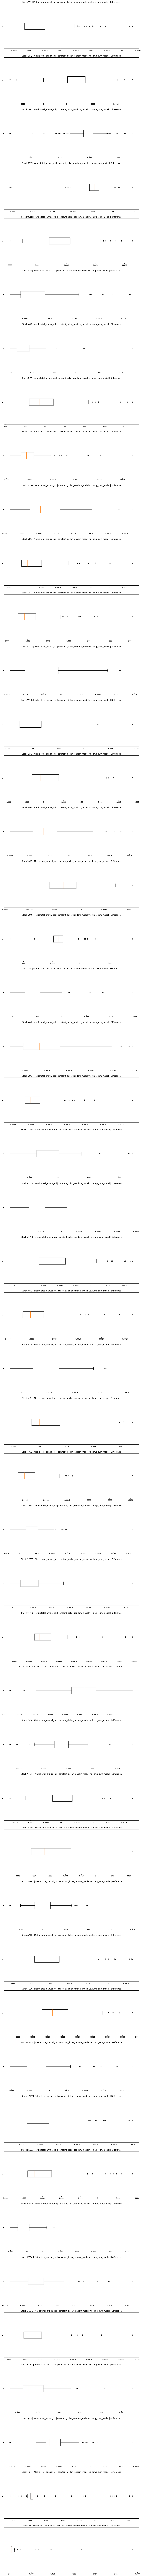

In [17]:
fig = stock_box_and_whisker_plot_comparison(df[df['fractional_shares'] == False], 'constant_dollar_random_model', 'lump_sum_model', 'total_annual_roi', True, False)
fig.show()

In [ ]:
bad_examples = get_sorted_bad_examples(df, 'constant_dollar_random_model', 'weighted_linear_regression_model', 'total_annual_roi', True, False)
pprint(bad_examples)

/var/folders/mj/000gxq2x64vb9t9p3frbt_0c0000gn/T/ipykernel_25959/3279234305.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


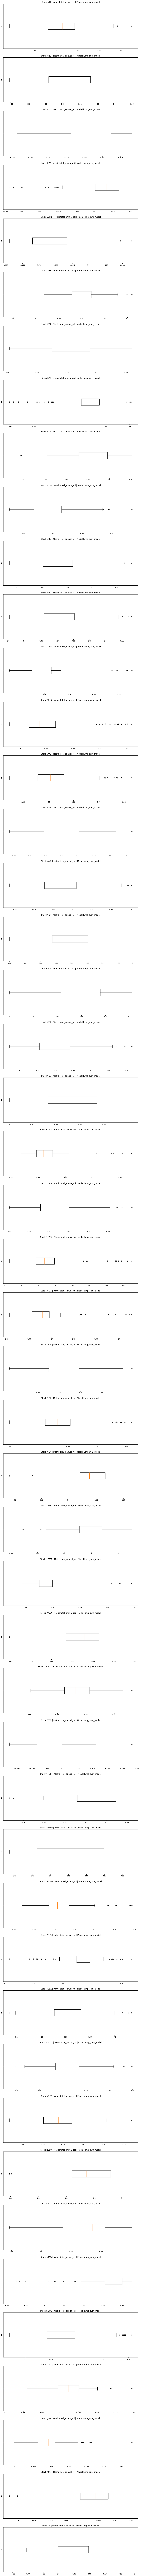

In [22]:
fig = stock_box_and_whisker_plot(df[df['fractional_shares'] == False], 'lump_sum_model', 'total_annual_roi')
fig.show()